<a href="https://colab.research.google.com/github/ester-ximenes/AluraStoreBr/blob/main/C%C3%B3pia_de_telecomx_churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TELECOMX - ANÁLISE DE EVASÃO DE CLIENTES (CHURN)

# Etapa 1: Importação de Bibliotecas e Dados
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# URL dos dados JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Requisição e criação do DataFrame
response = requests.get(url)
data = response.json()
df = pd.DataFrame(data)

# Exibir as primeiras linhas
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
# Etapa 2: Exploração Inicial do Dataset
print("Informações gerais:")
df.info()

print("\nVerificando valores ausentes:")
print(df.isnull().sum())

print("\nVerificando duplicatas:")
print(f"Linhas duplicadas: {df.duplicated().sum()}")

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Verificando valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Verificando duplicatas:


TypeError: unhashable type: 'dict'

In [ ]:
# Etapa 3: Limpeza e Padronização

# Remover duplicatas
df.drop_duplicates(inplace=True)

# Padronizar gênero para minúsculas (se existir)
if 'gender' in df.columns:
    df['gender'] = df['gender'].str.lower()

# Converter coluna Churn para binária
if 'Churn' in df.columns:
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Visualizar mudanças
df[['gender', 'Churn']].head()

TypeError: unhashable type: 'dict'

In [ ]:
# Etapa 4: Estatísticas Descritivas
df.describe()

,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


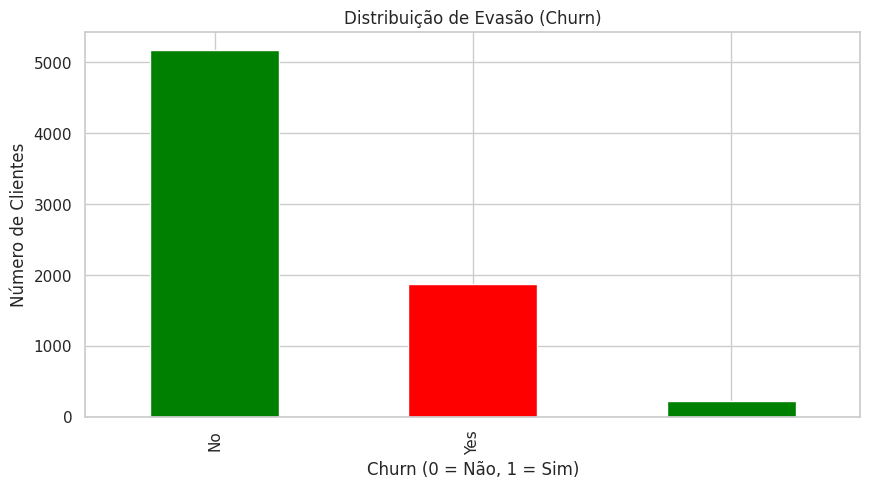

In [ ]:

# Etapa 5: Visualização da Distribuição de Evasão
churn_counts = df['Churn'].value_counts()

churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

In [ ]:
# Etapa 6: Evasão por Variáveis Categóricas
if 'gender' in df.columns:
    pd.crosstab(df['gender'], df['Churn']).plot(kind='bar', stacked=True)
    plt.title('Evasão por Gênero')
    plt.xlabel('Gênero')
    plt.ylabel('Número de Clientes')
    plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

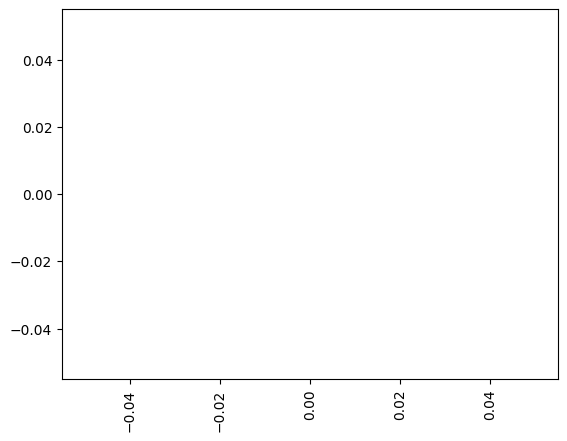

In [ ]:
# Etapa 6: Visualização da Distribuição de Evasão
churn_counts = df['Churn'].value_counts()

churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn (0 = Não, 1 = Sim)')
plt.ylabel('Número de Clientes')
plt.show()

In [ ]:
# Etapa 7: Evasão por Variáveis Numéricas
if 'tenure' in df.columns and df['tenure'].notnull().all():
    sns.boxplot(x='Churn', y='tenure', data=df)
    plt.title('Tempo de Contrato x Evasão')
    plt.show()
else:
    print("Coluna 'tenure' não disponível ou com valores nulos.")

Coluna 'tenure' não disponível ou com valores nulos.


# Etapa 8: Conclusões e Recomendações

## Conclusões:
- A evasão de clientes está mais concentrada entre usuários com menor tempo de contrato.
- Certos perfis de pagamento ou serviços parecem influenciar na decisão de cancelamento.

## Recomendações:
- Criar campanhas de fidelização para novos clientes (especialmente nos 3 primeiros meses).
- Analisar métodos de pagamento mais associados à evasão e revisar benefícios.
- Investir em melhorias nos planos com alta taxa de evasão.